In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from imageio import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [2]:
response = pd.read_csv('multipleChoiceResponses.csv', encoding = 'ISO-8859-1')

In [3]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())
# 즉 나이는 신뢰성이 매우 떨어진다!!

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


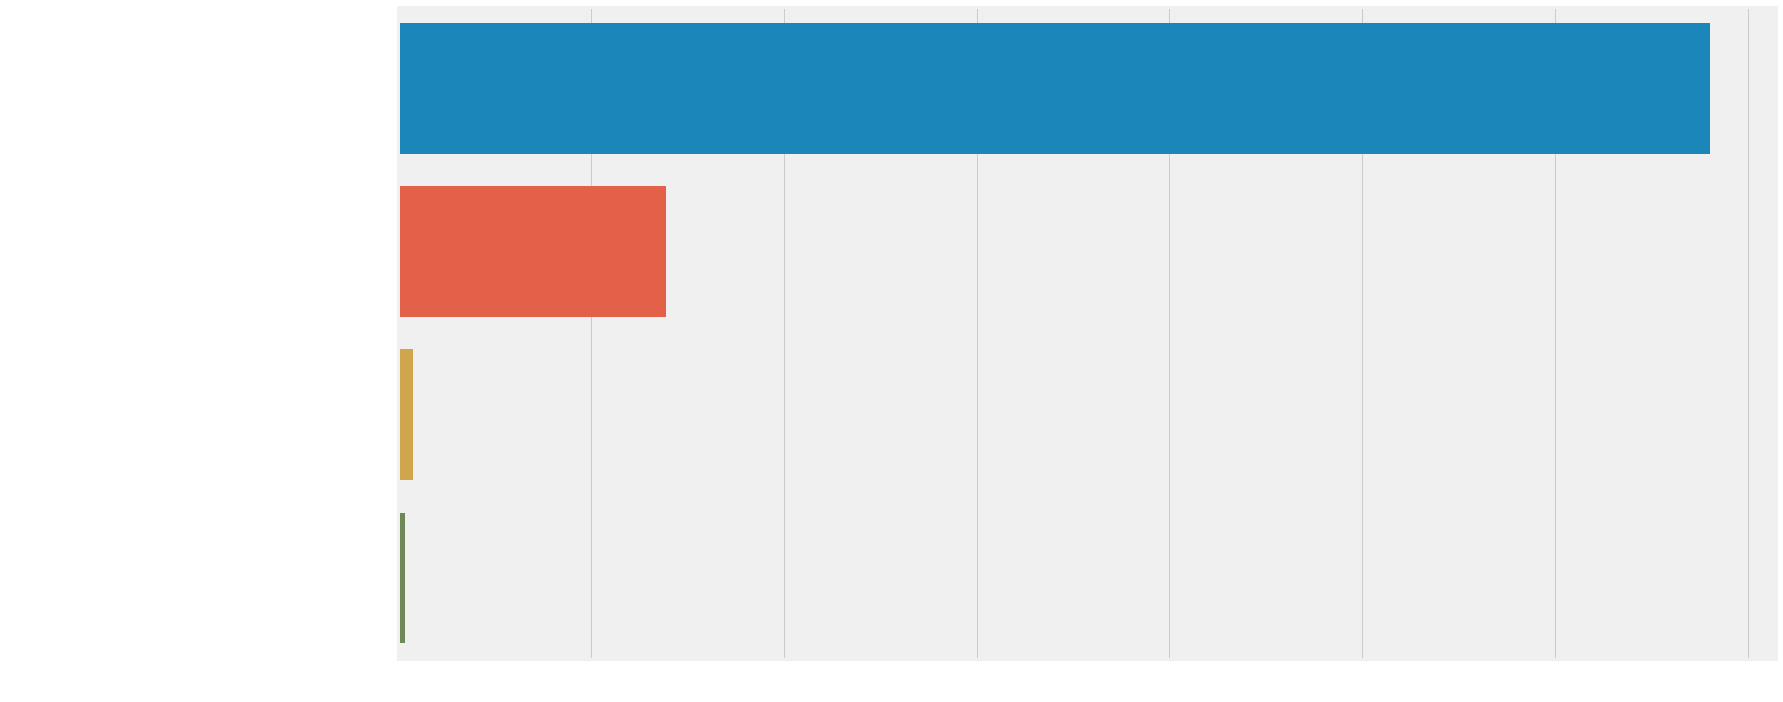

In [5]:
SMALL_ = 8
MEDIUM_ = 10
BIG_ = 14

plt.rc('font', size=BIG_)
plt.rc('xtick', labelsize=BIG_) # xtick으로 labelsize를 조절
plt.rc('ytick', labelsize=BIG_) # ytick으로 labelsize를 조절
plt.rc('axes', labelsize=BIG_)
plt.rc('axes', titlesize=BIG_)
plt.rc('legend', fontsize=BIG_)
plt.rc('figure', titlesize=BIG_)

plt.subplots(figsize=(22,12))
ax = sns.countplot(y=response['GenderSelect'], order=response['GenderSelect'].value_counts().index)
plt.show()

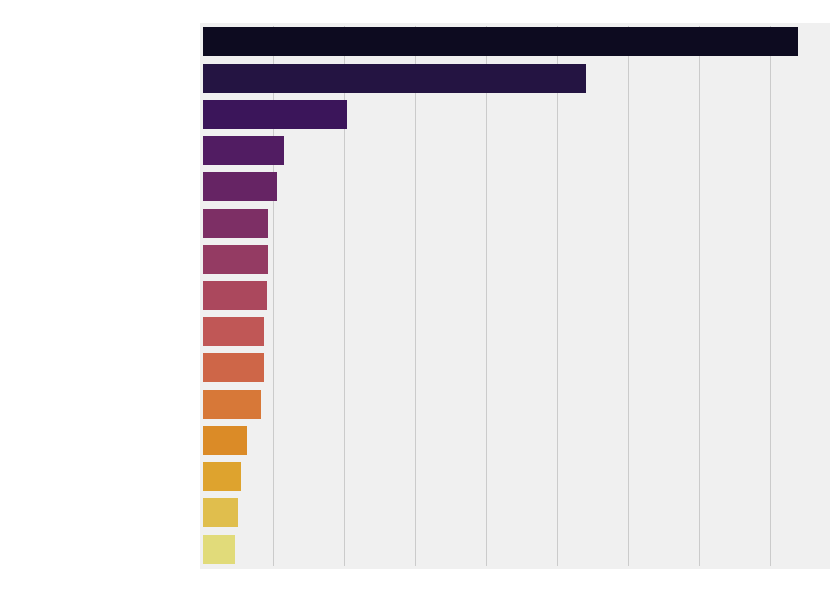

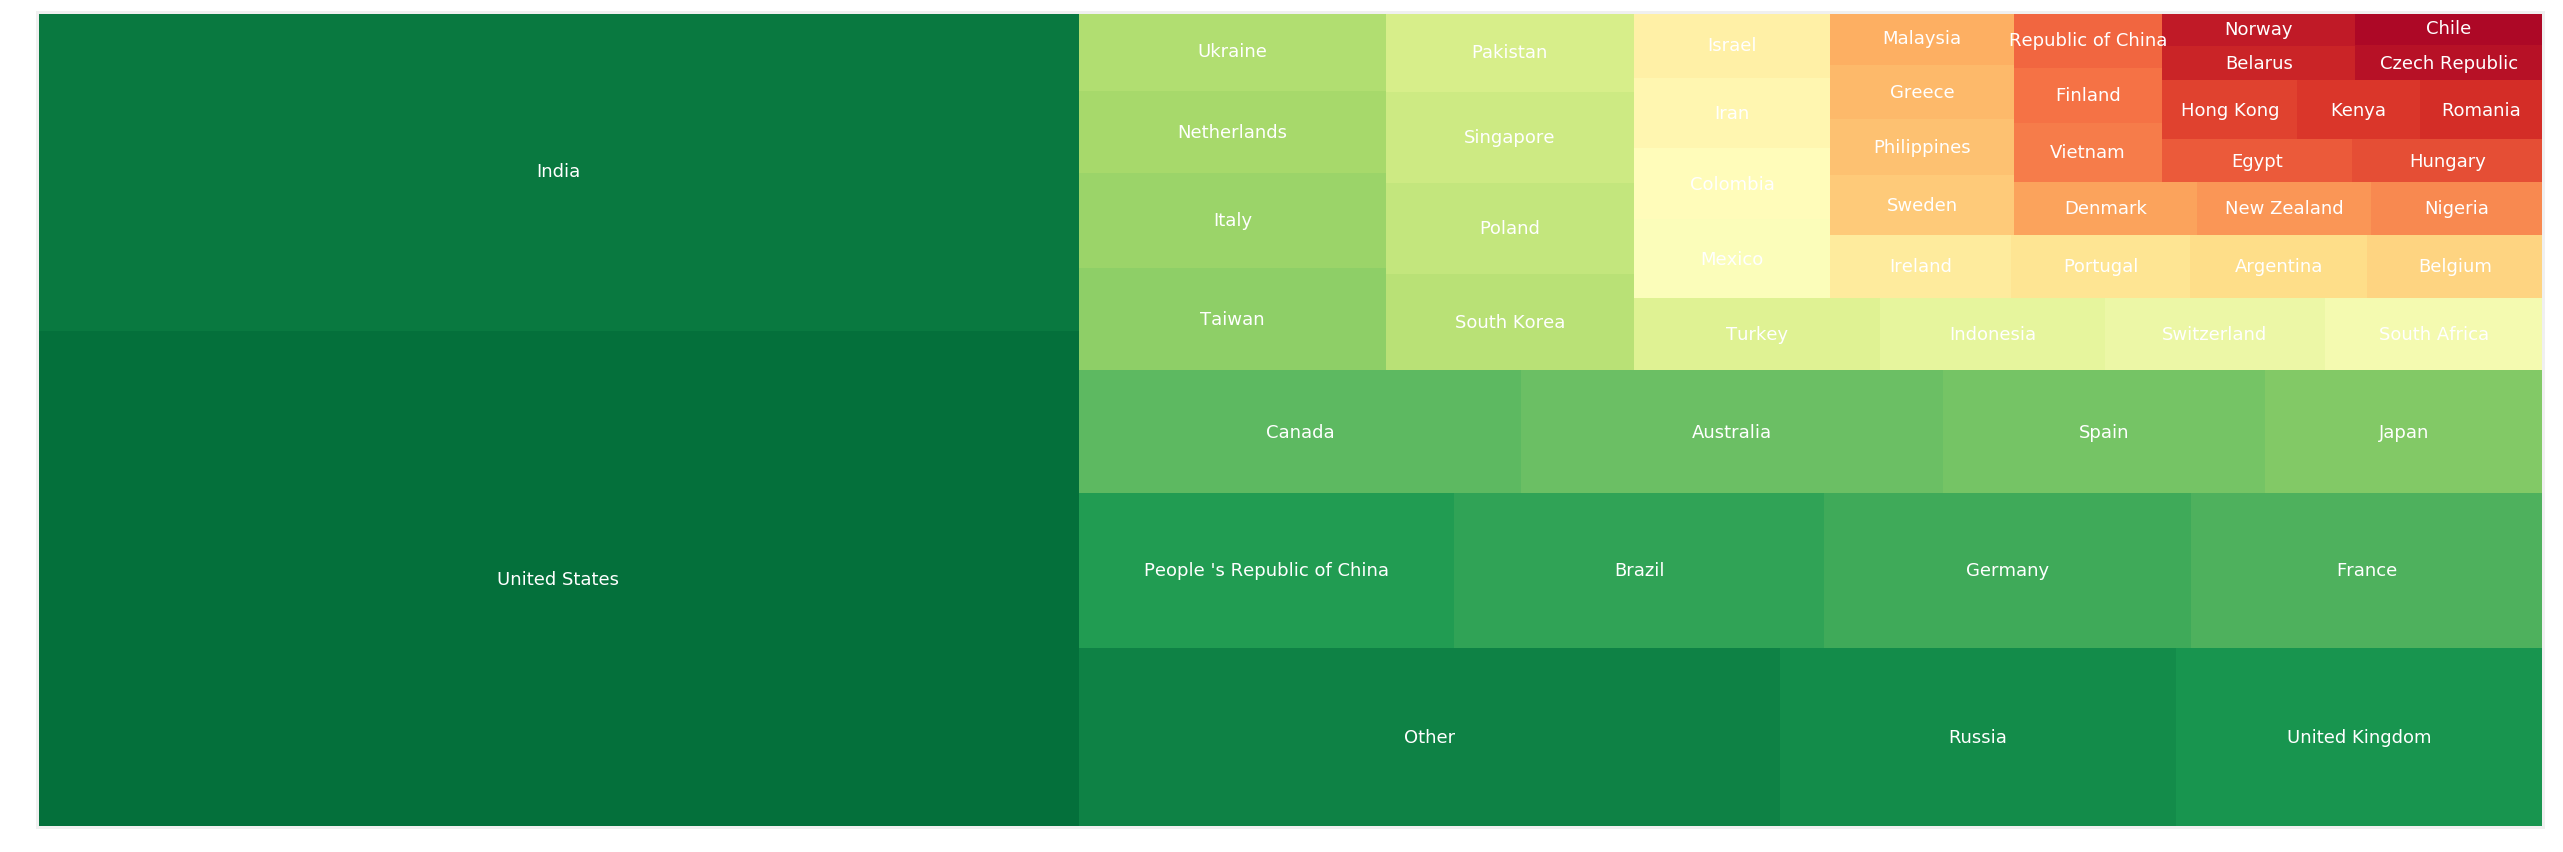

In [6]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'],resp_coun.index,palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()
tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52),text_kwargs={'fontsize':18}) #squarify font size조절
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

In [7]:

response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left') #여기에 rates가 있어서 exchangeRate랑 originCountry column이 들어간거다!

salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().min()) # 음수가 나와서 코드를 다음과 같이 바꿨다.. (음수가 없는데 음수값이 나와서 코드를 바꿈!!)
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())


Maximum Salary is USD $ 208999999
Minimum Salary is USD $ 0.0
Median Salary is USD $ 53812.0


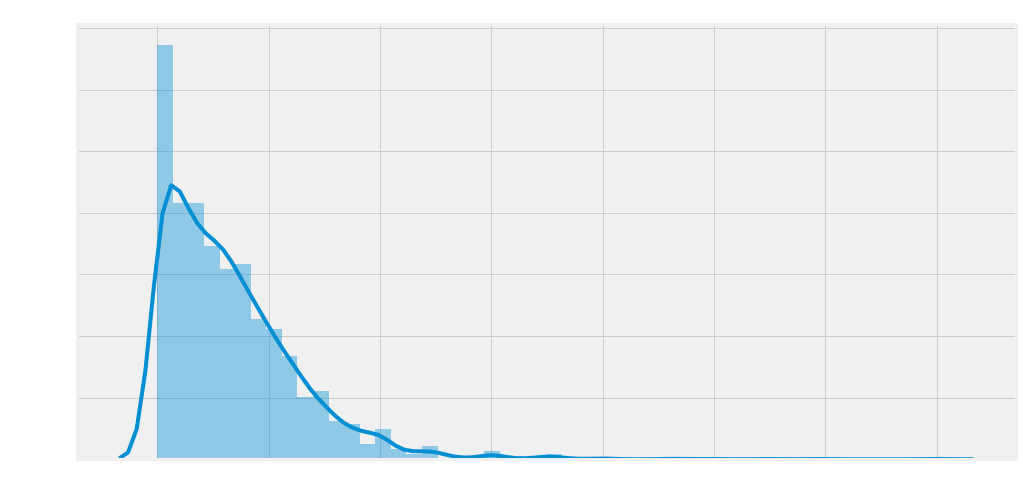

In [8]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000] # 이걸 응용하면 0보다 작은 값이 있을 경우 제외할 수 있다.
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

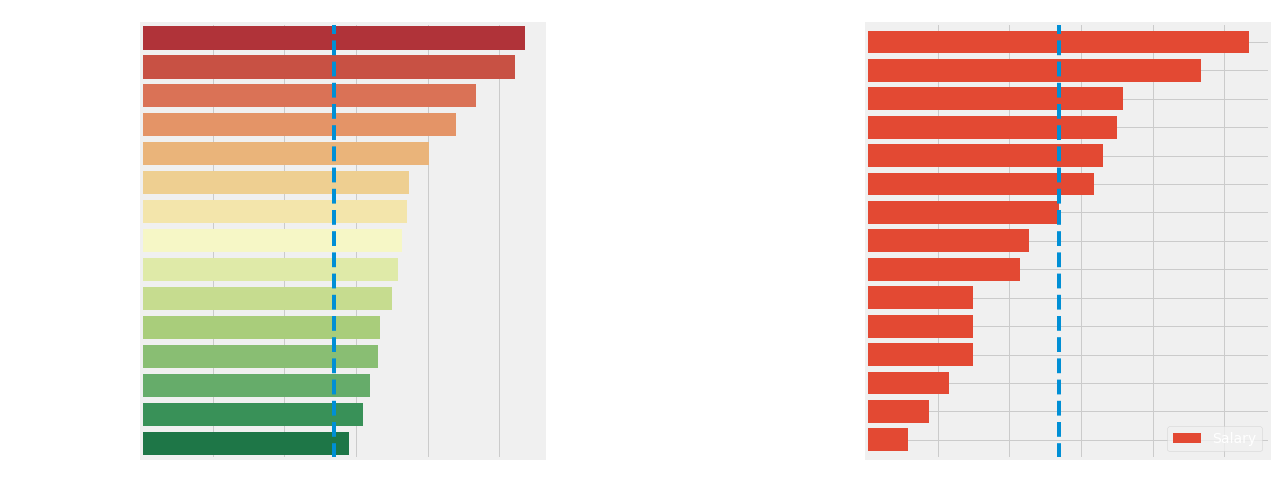

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame() #salary가 있으니 ['Salary']를 쓸 수 있다.
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8) # 두 plot의 label명이 곂치지 않도록 조정
plt.show()

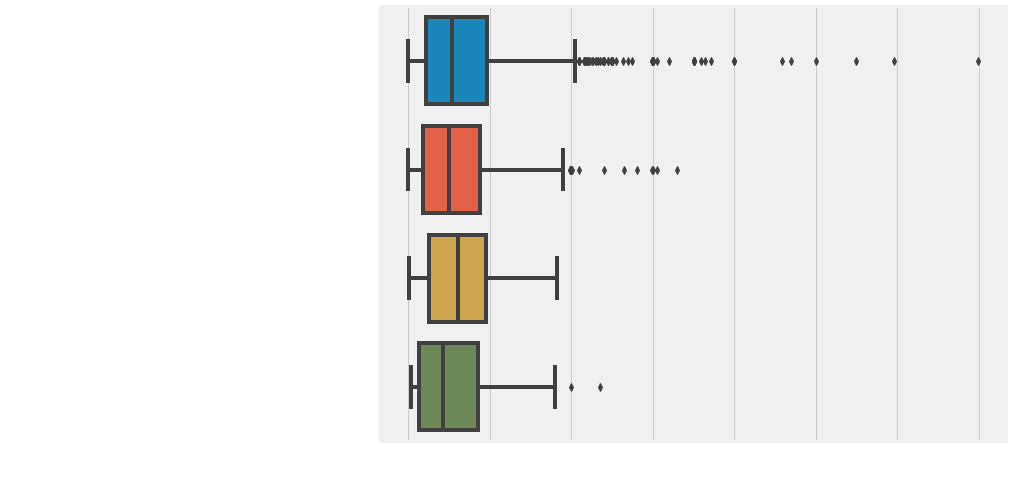

In [10]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.ylabel('')
plt.show()

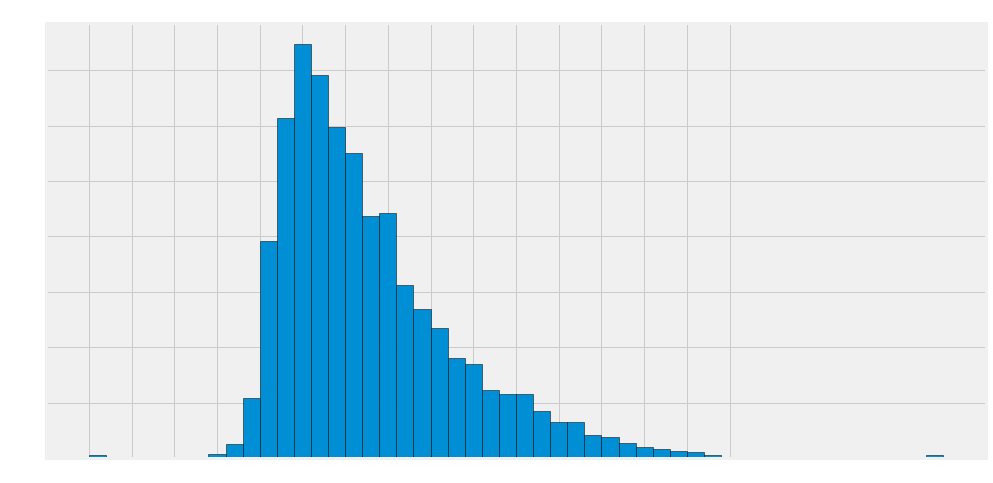

In [11]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

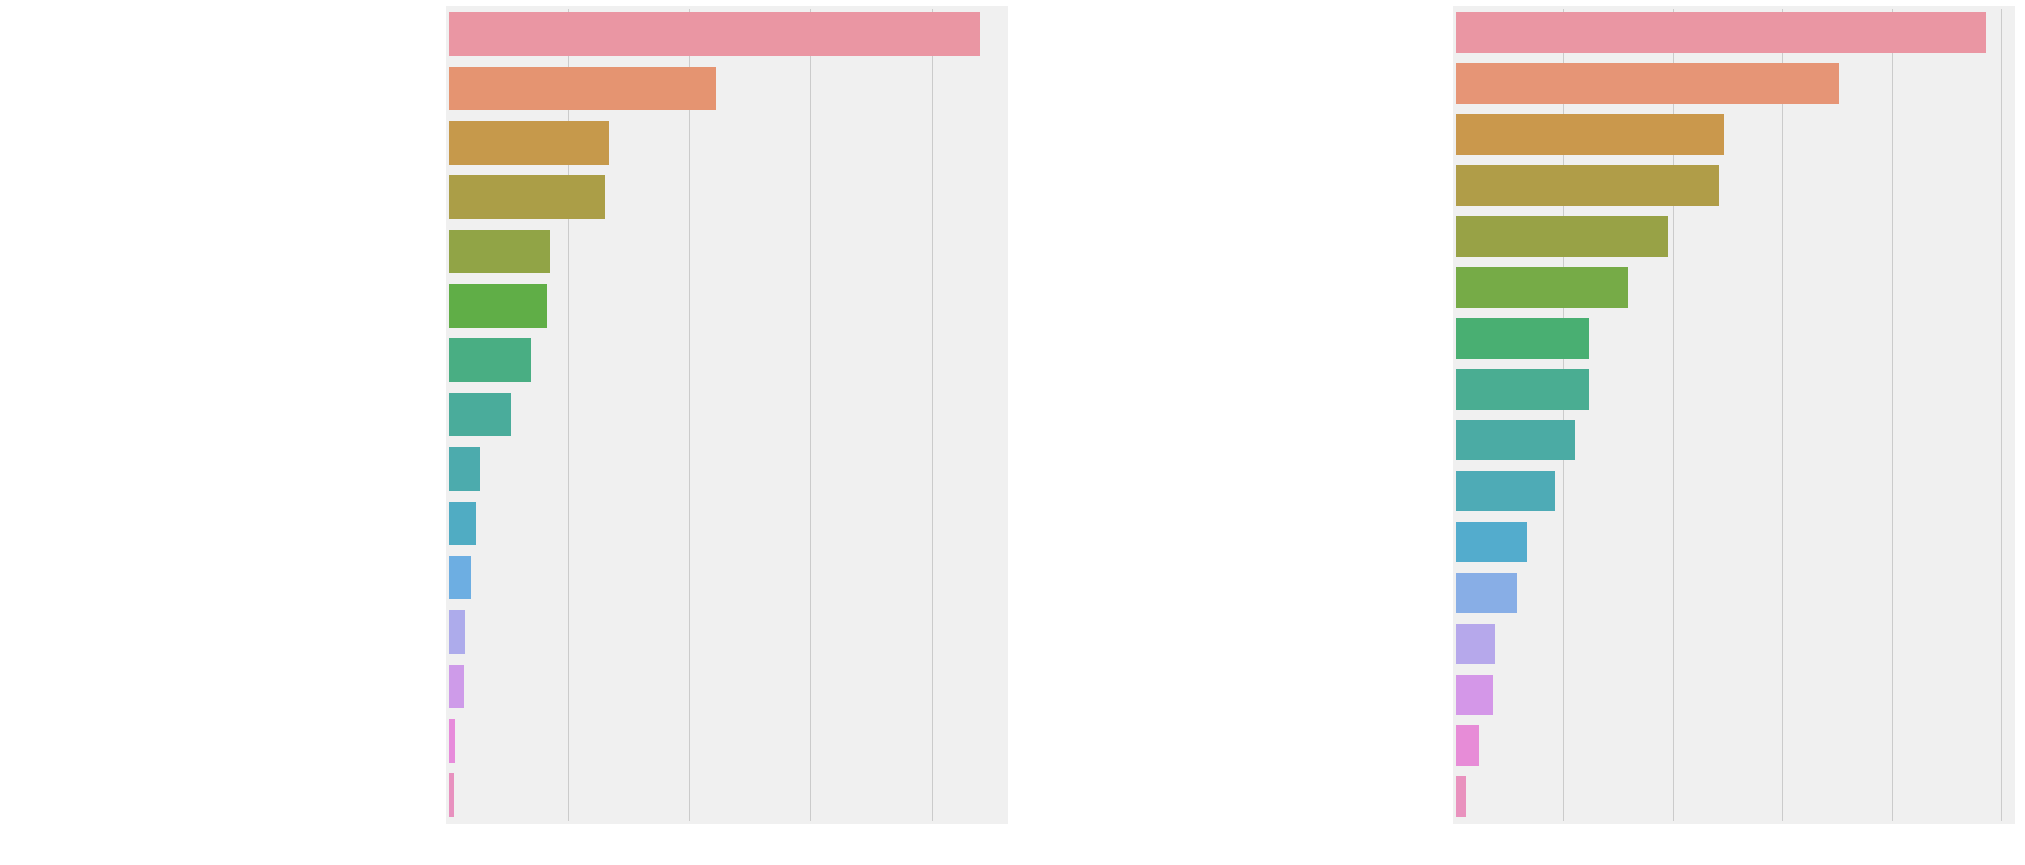

In [12]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
# ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
# ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

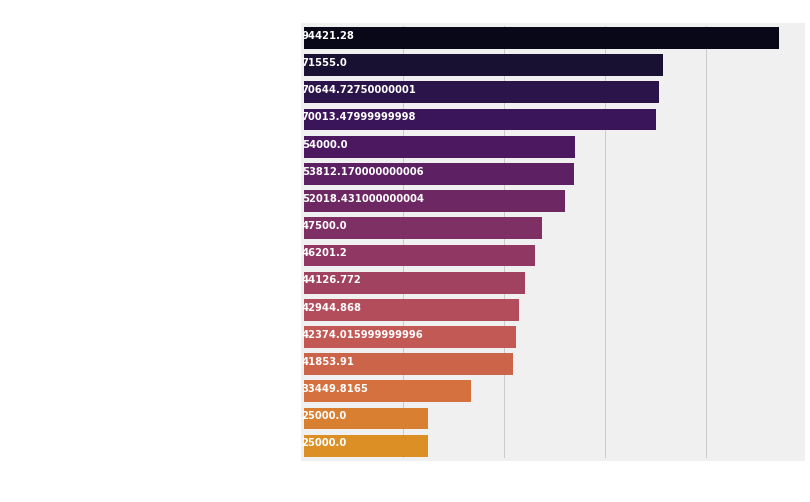

In [13]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

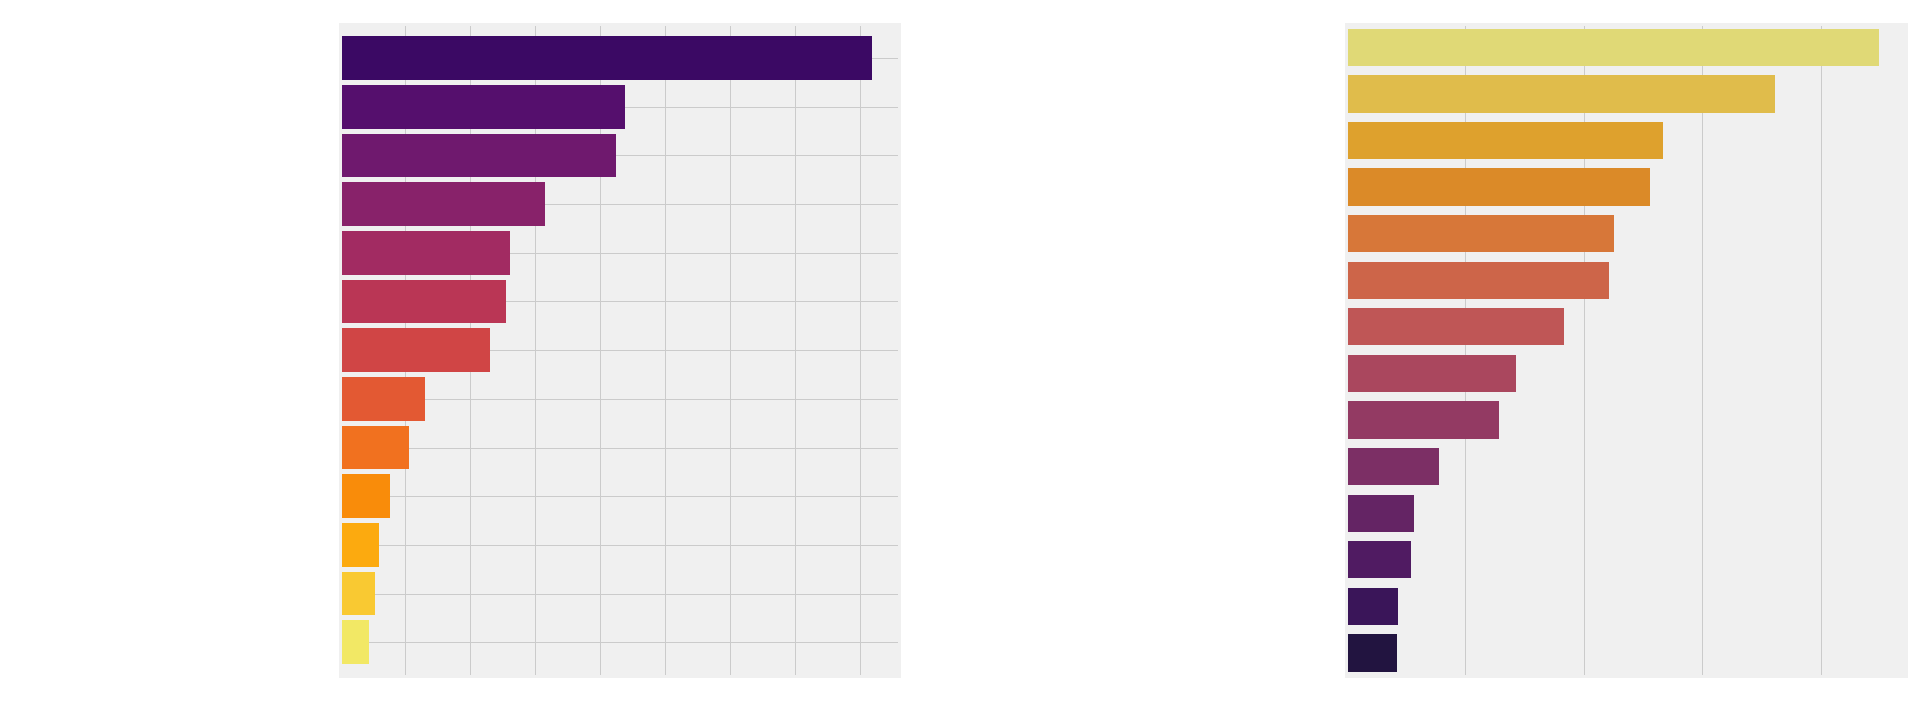

In [14]:
f, ax = plt.subplots(1,2, figsize=(25,12))
skills = response['MLSkillsSelect'].str.split(',')
skills_set = [] # 그냥 각 label값이 담긴다... 그래서 value_counts로 개수파악하고..
for i in skills.dropna():
    skills_set.extend(i)
plt1 = pd.Series(skills_set).value_counts().sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno_r',15),ax=ax[0])
# sns.barplot(plt1[0], plt1.index, ax=ax[0], palette=sns.color_palette('inferno_r', 15)) #15는 색상의 차이 인듯??
ax[0].set_title('ML Skills')

tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i) #extend는 element값을 추가 리스트형식으로 append하지 않는다.
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
# plot.barh 이런식으로 오는거는 색상을 쓸때 color를사용 (not palette)
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

# salary.isnull().sum() # 까먹지 말자 null값체크 

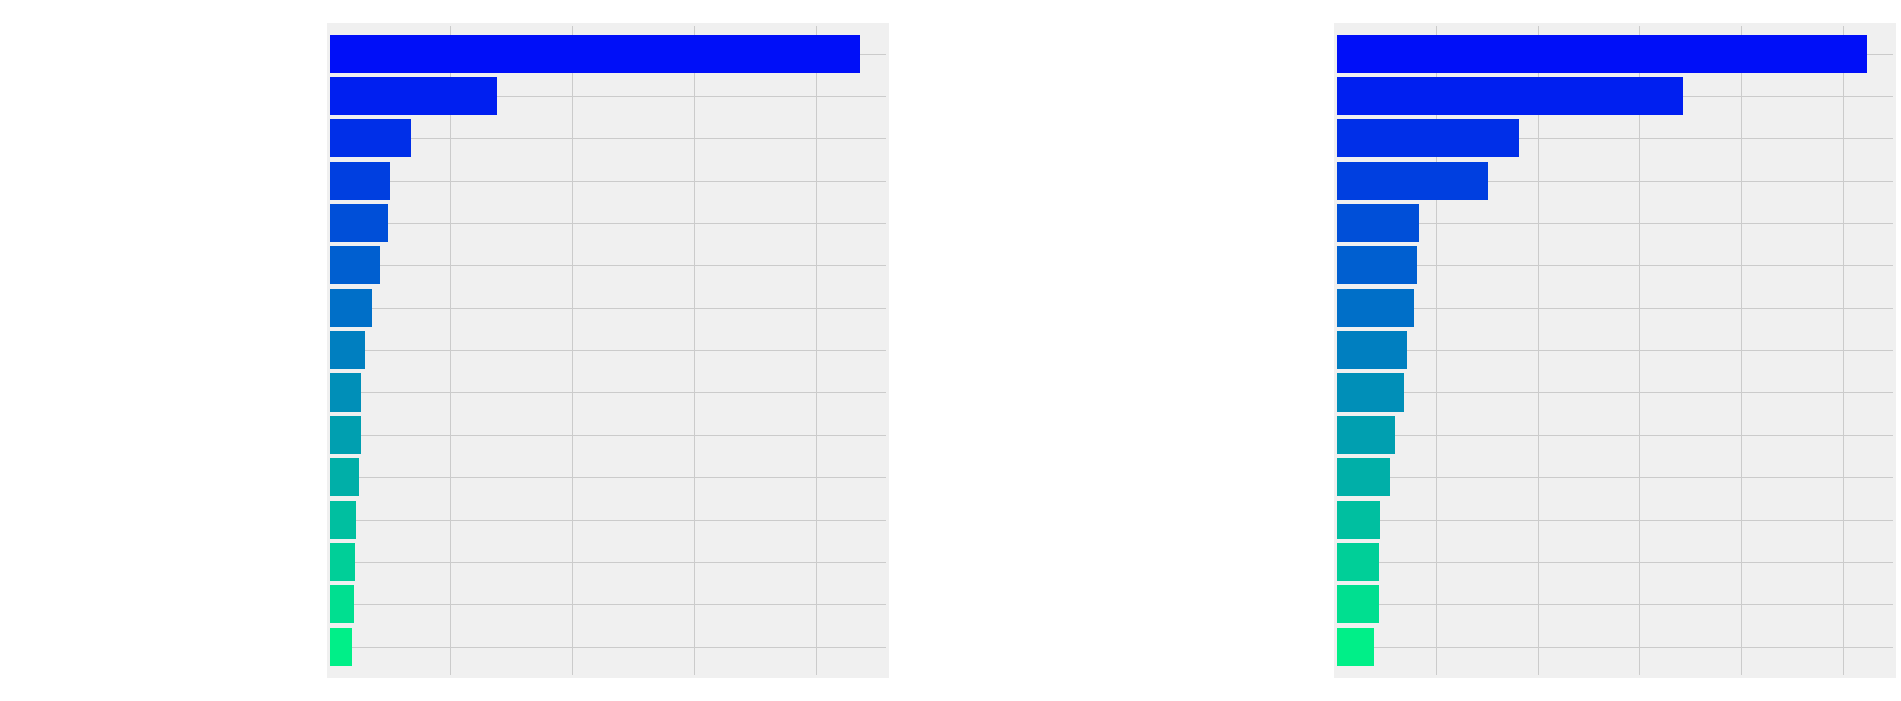

In [15]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('winter_r',15),ax=ax[0])

# plot.barh 이런식으로 오는거는 색상을 쓸때 color를사용 (not palette)
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

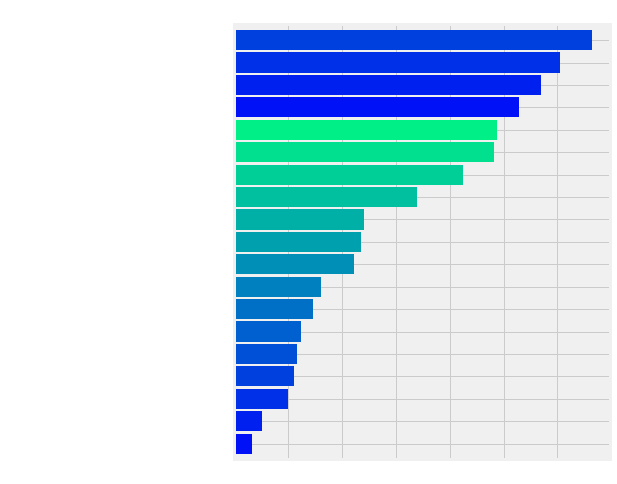

In [16]:
plt.subplots(figsize=(6,8))
learn = response['LearningPlatformSelect'].str.split(',')
platform = list()
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts().sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('winter', 15))
plt.title('Best Platforms to Learn', size=15)
plt.show()

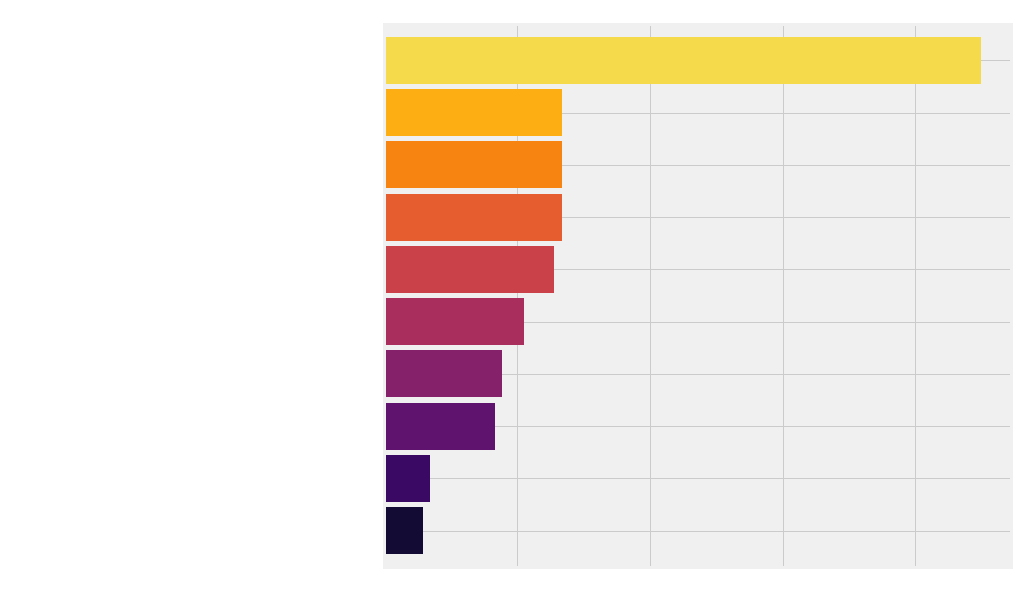

In [17]:
plt.subplots(figsize=(10,10))
hard = response['HardwarePersonalProjectsSelect'].str.split(',')
hardware = []
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno', 10))
plt.title('Machines Used')
plt.show()

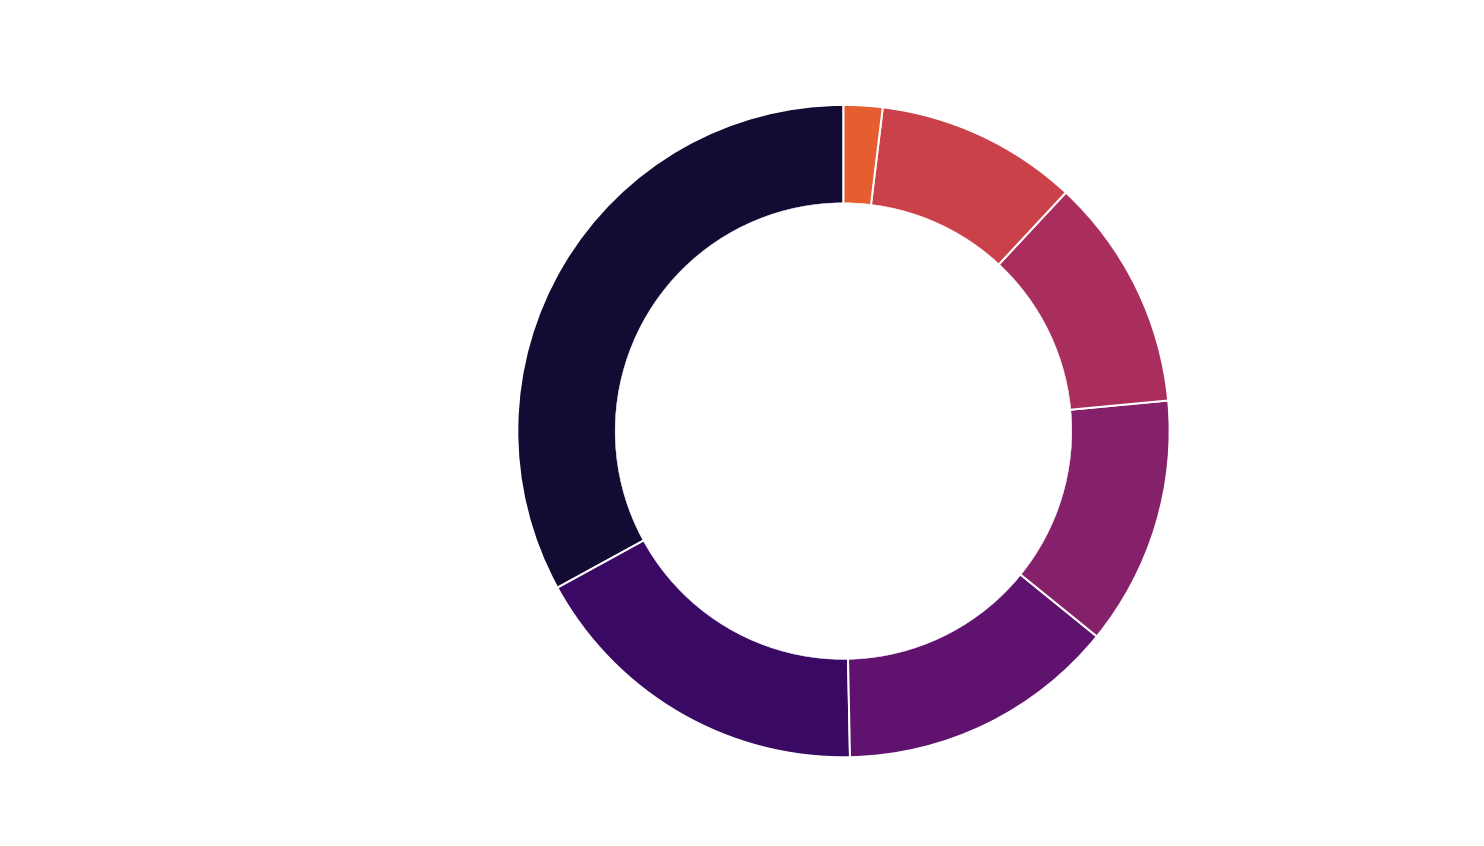

In [18]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset = []
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('inferno', 10), startangle=90, wedgeprops = {'linewidth' : 2, 'edgecolor' : 'white'})
plt.title('Dataset Source')
my_circle = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

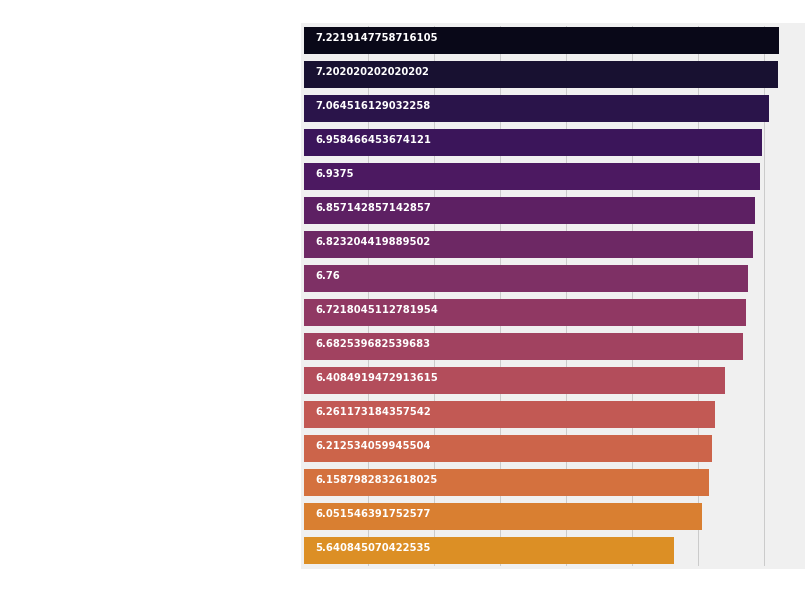

In [19]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.2, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

In [20]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

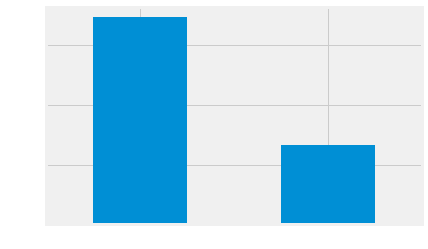

In [21]:
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.xticks(rotation=360)
plt.show()

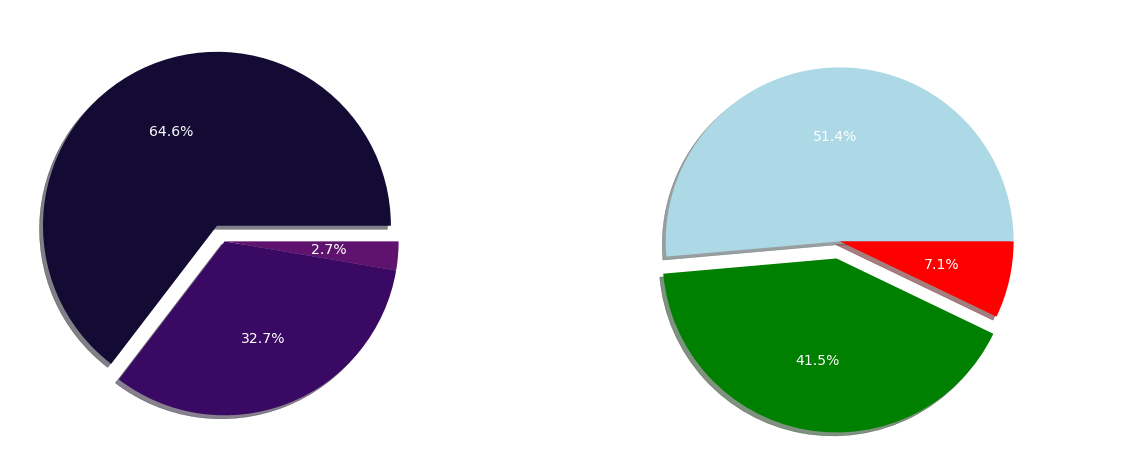

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=sns.color_palette('inferno', 10))
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

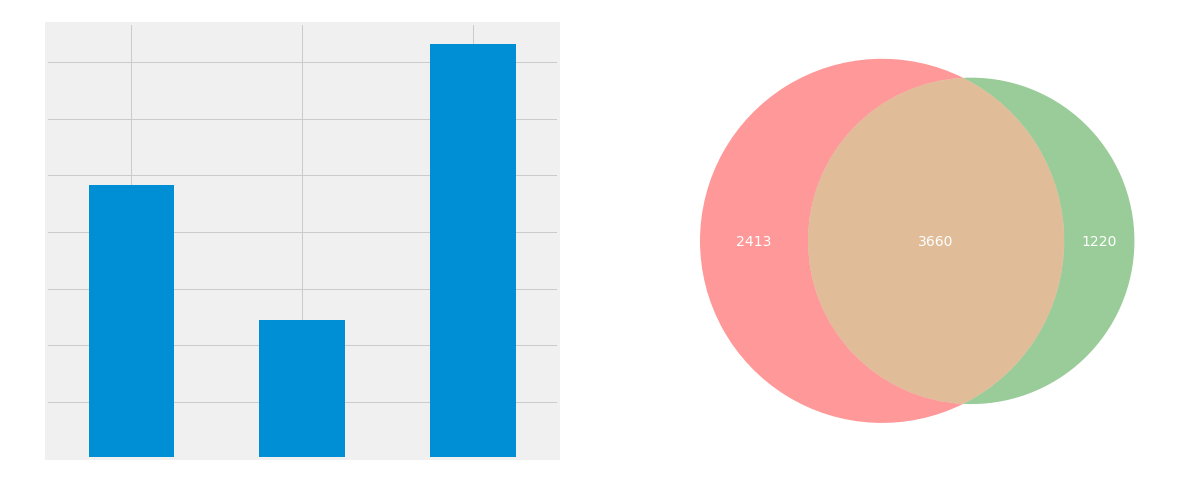

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
ax[0].tick_params(labelrotation=360) #subplot xtick rotation
# ax[0].set_xticklabels(labels, rotation=360)
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

In [24]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


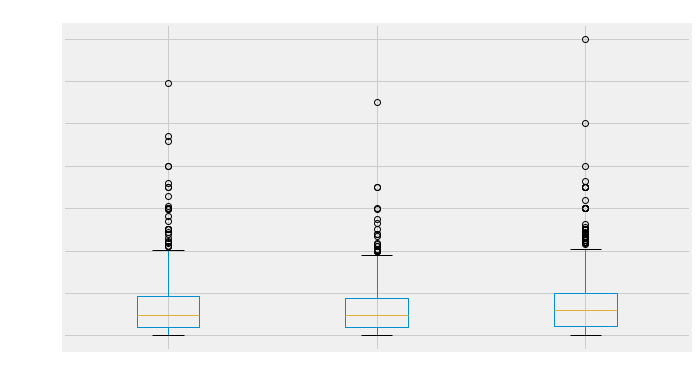

In [25]:
trying.plot.box()
plt.title('Compensation By Language')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

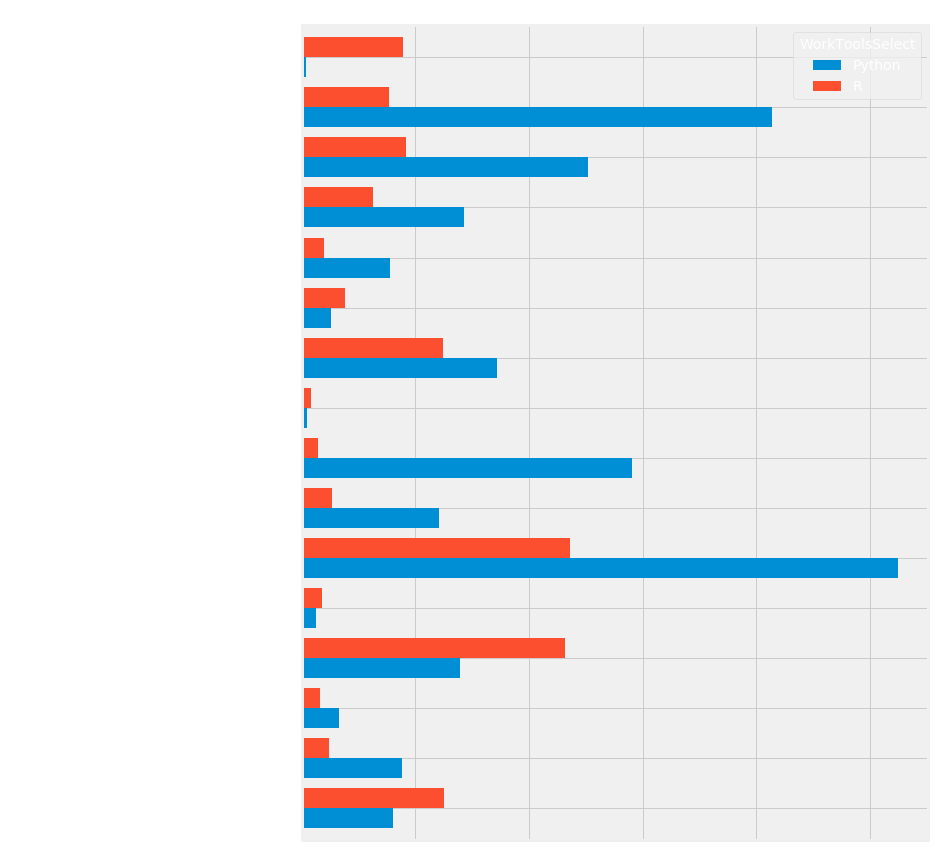

In [26]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python' #전부 Python으로 변경 
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r]) # concat은 합치는건데 Dafault값이 행을 합쳐서 아래에 생김
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index() #'Age'는 의미없음 그냥 있는 column명 중에 아무거나 넣어줘도 값은 동일하게 나옴 즉['Country'] 이걸 넣어도 동일하게 나옴
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

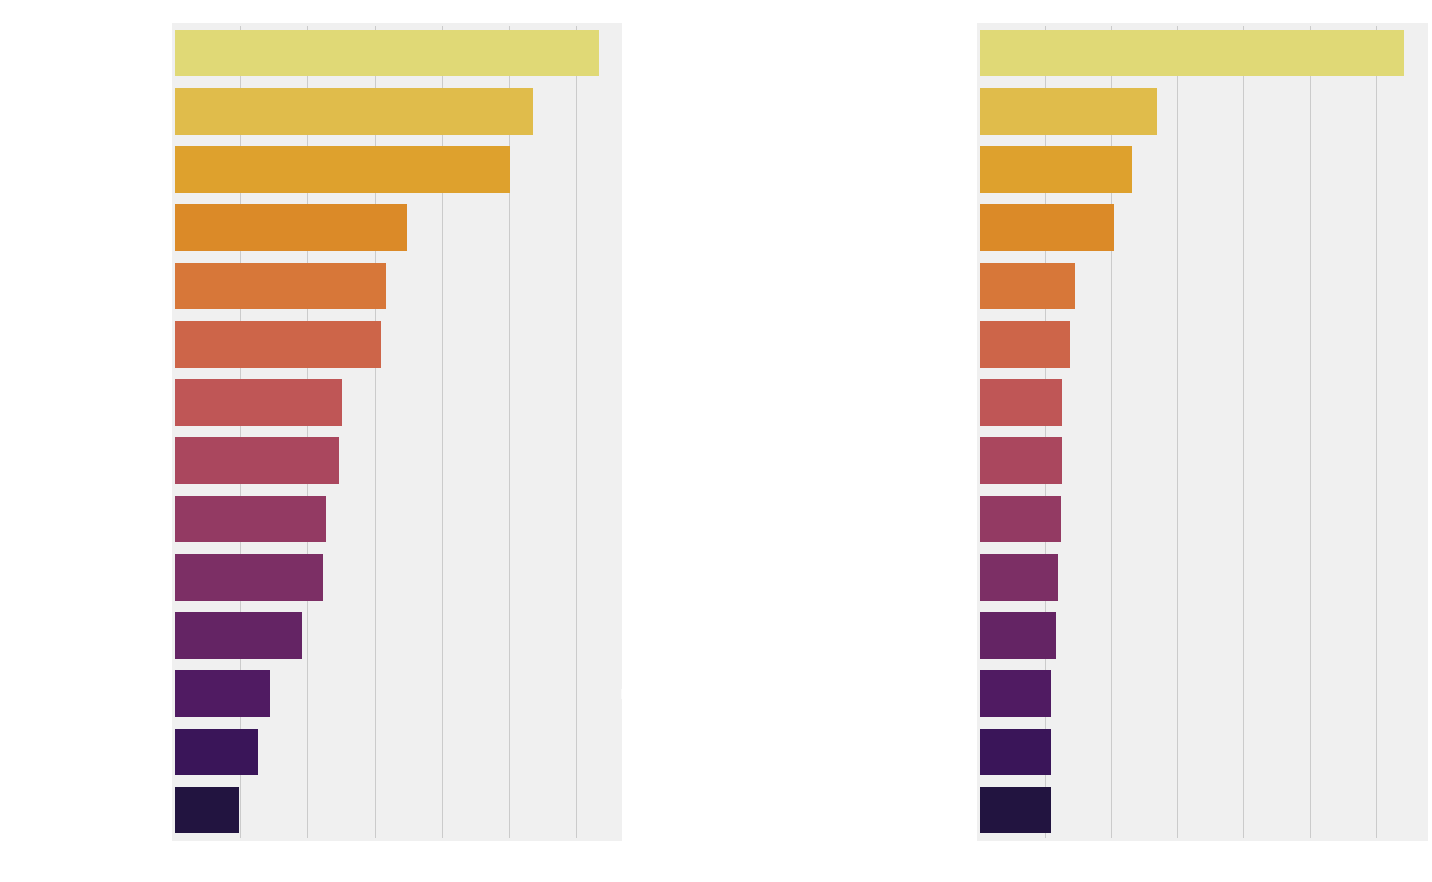

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
python['WorkToolsSelect']
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
#범위는 [1:15]를 해서 python을 제외하고 나머지 사용 툴에 대하여 그래프를 그림!
R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

In [28]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

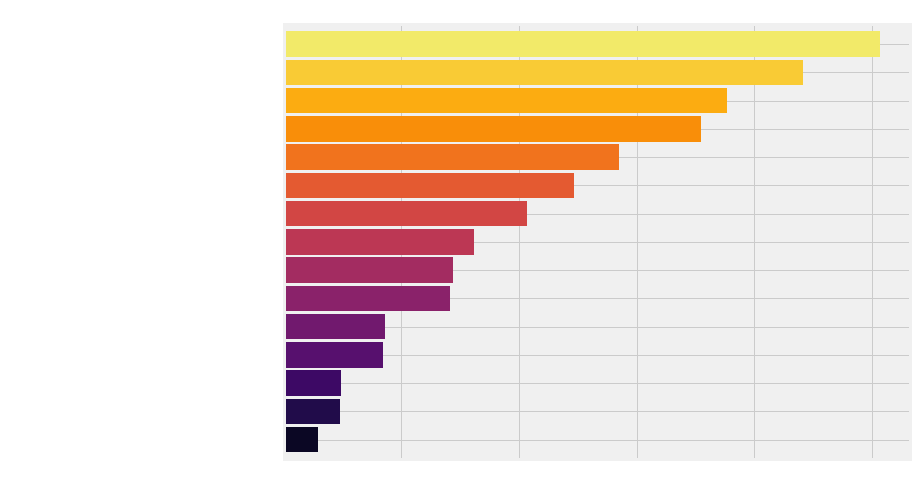

In [29]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.title('Job Titles',size=15)
plt.show()

In [30]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist'] #Data Scientist만 담자! ['CurrentJobTitleSelect'] 이곳에

In [31]:
scientist = pd.concat([scientist, true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

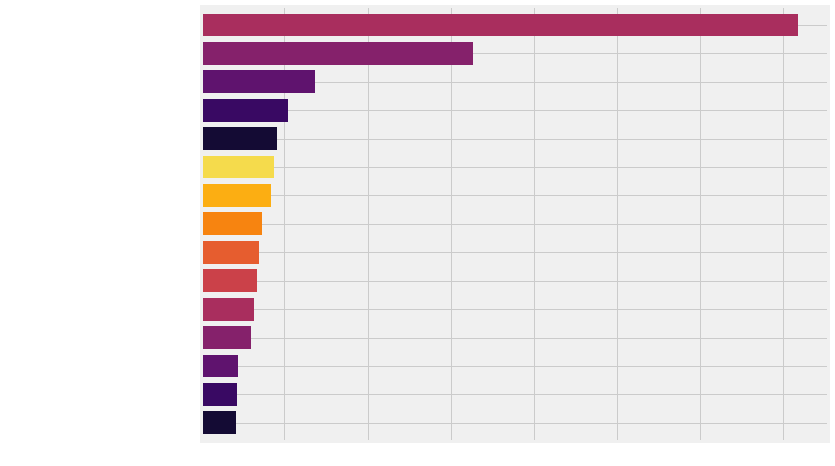

In [32]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).sort_values(ascending=True).plot.barh(width=0.8, color = sns.color_palette('inferno', 10))
plt.show()

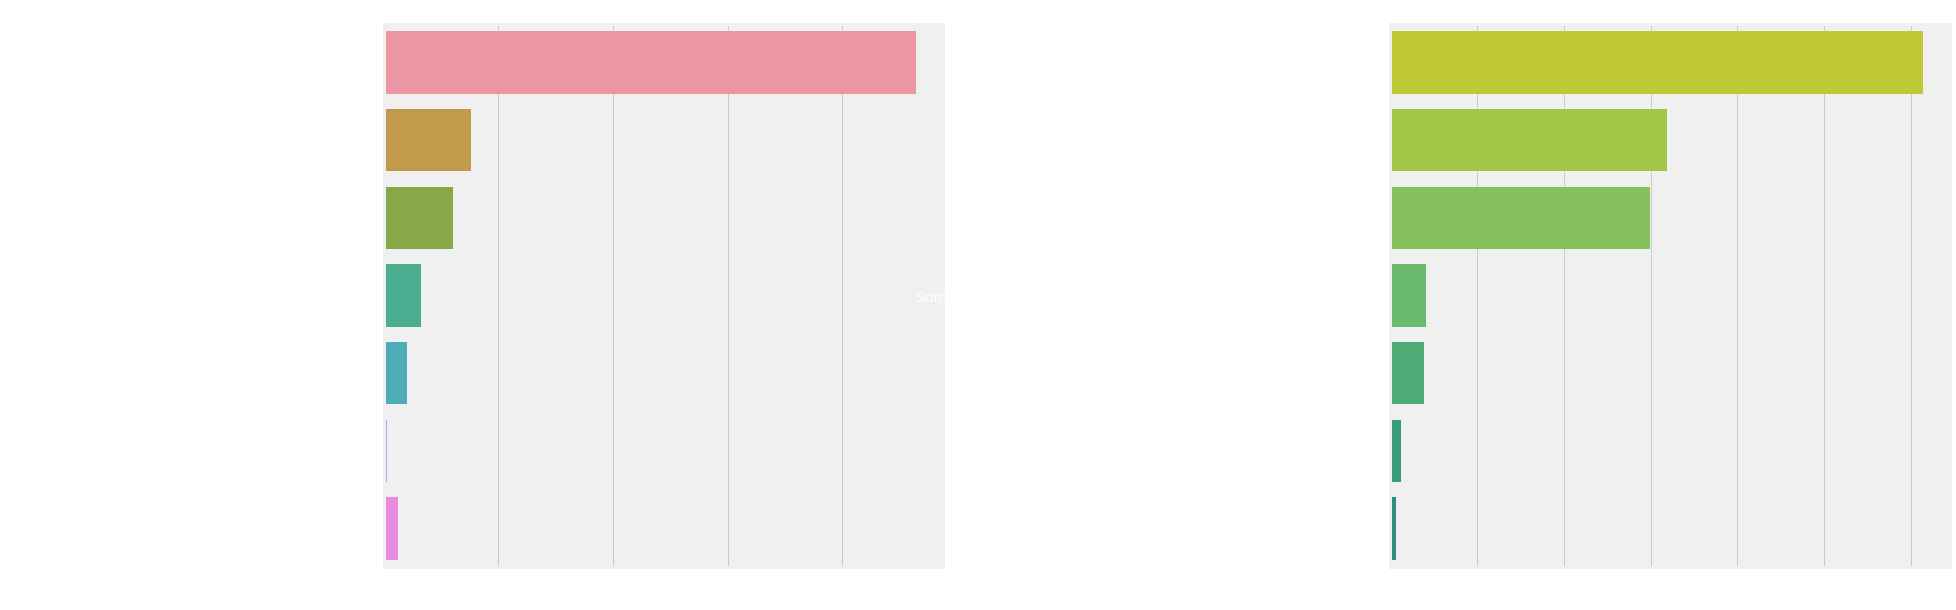

In [33]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

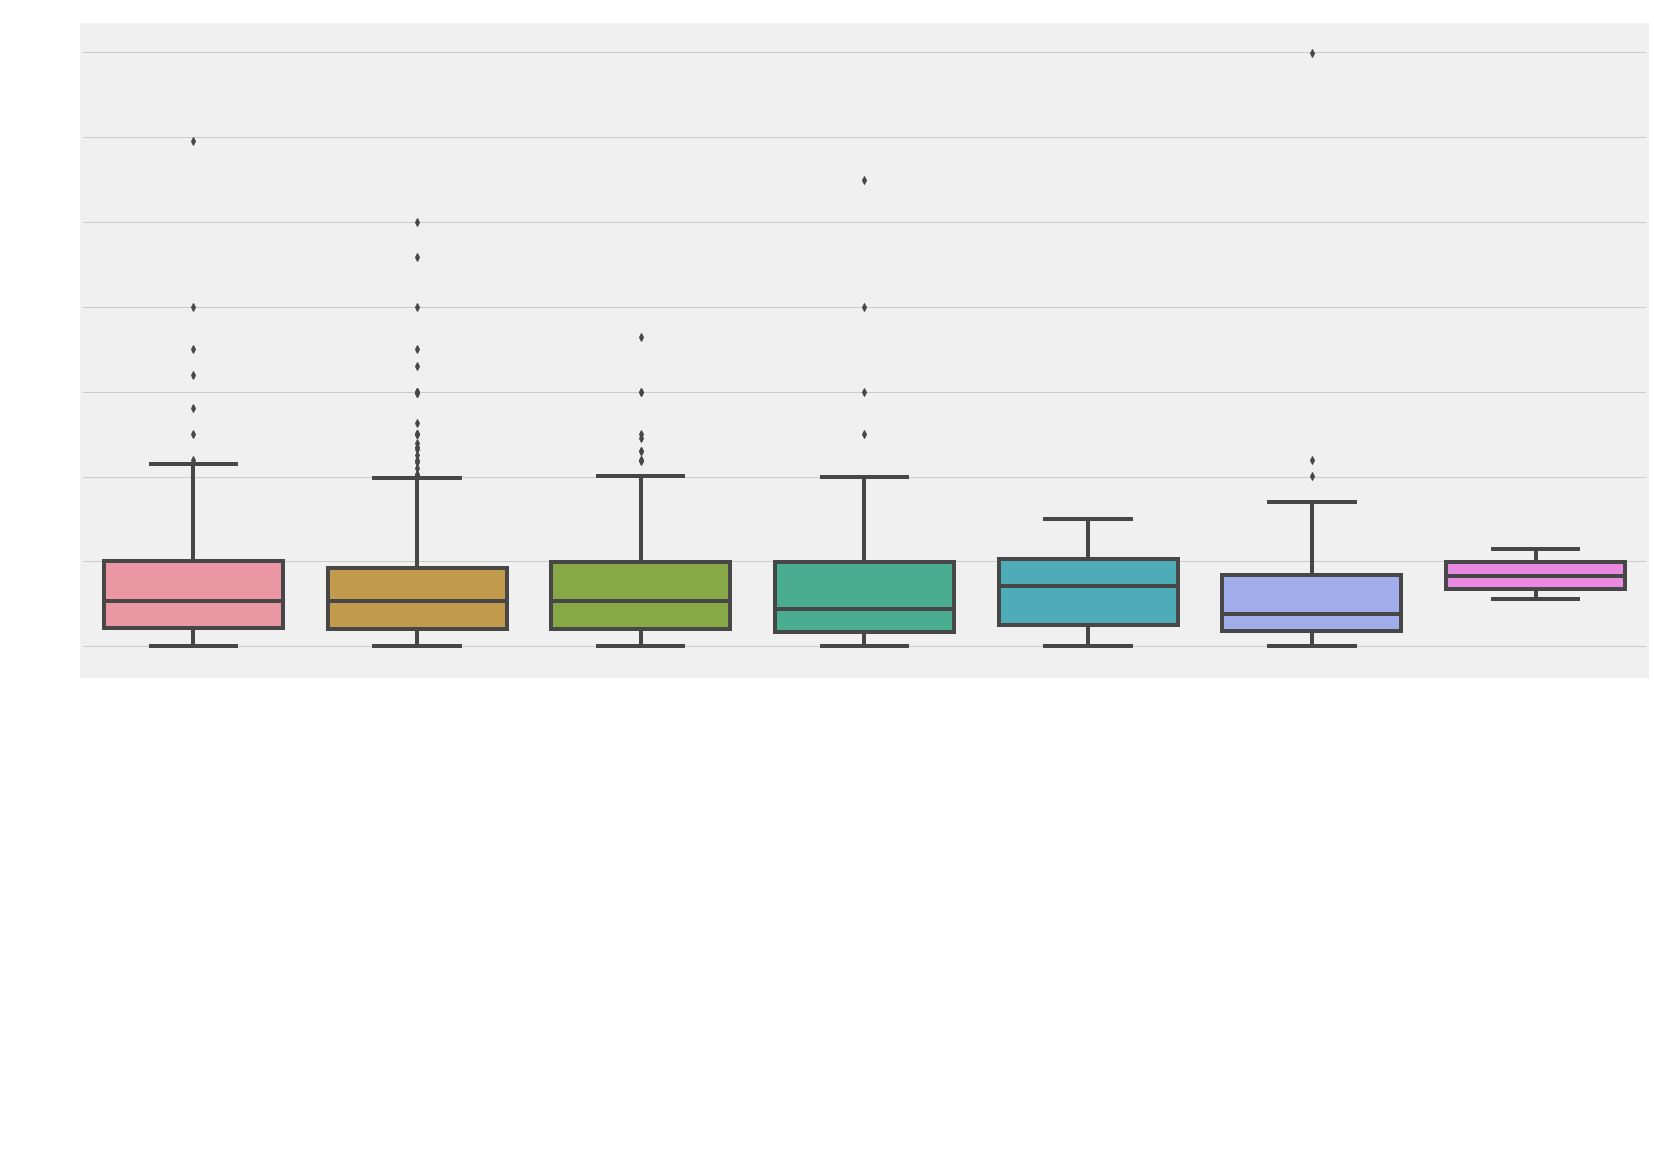

In [34]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

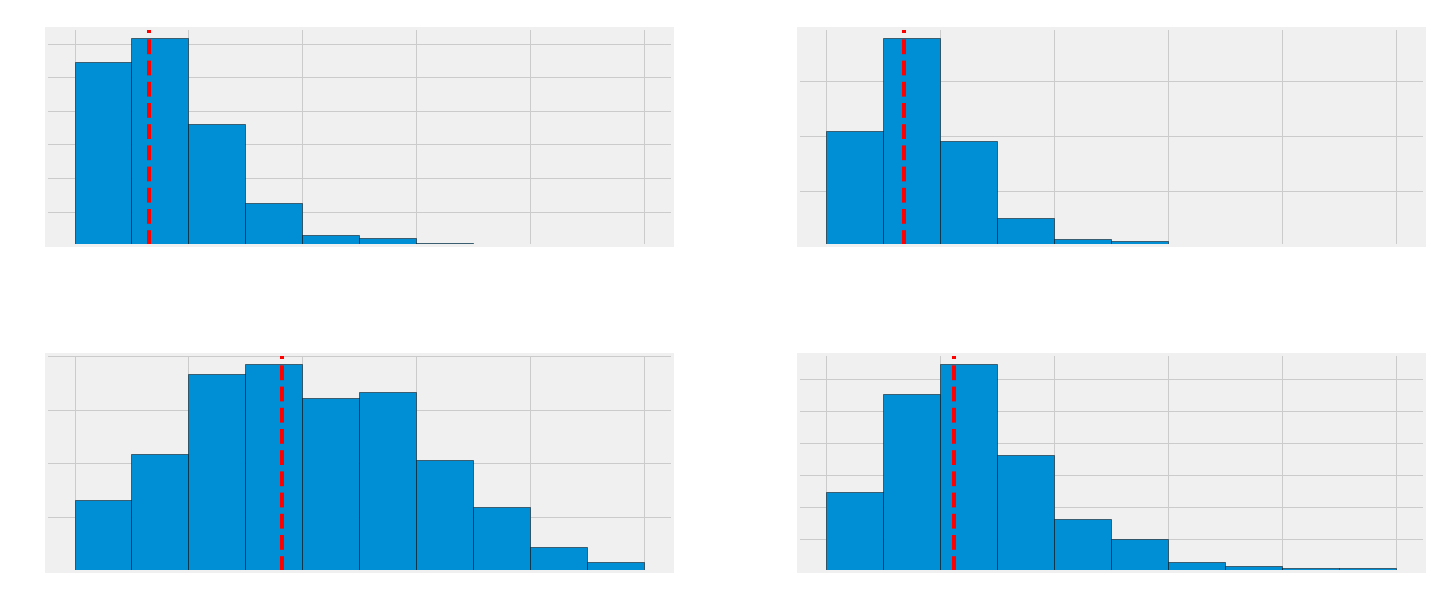

In [35]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

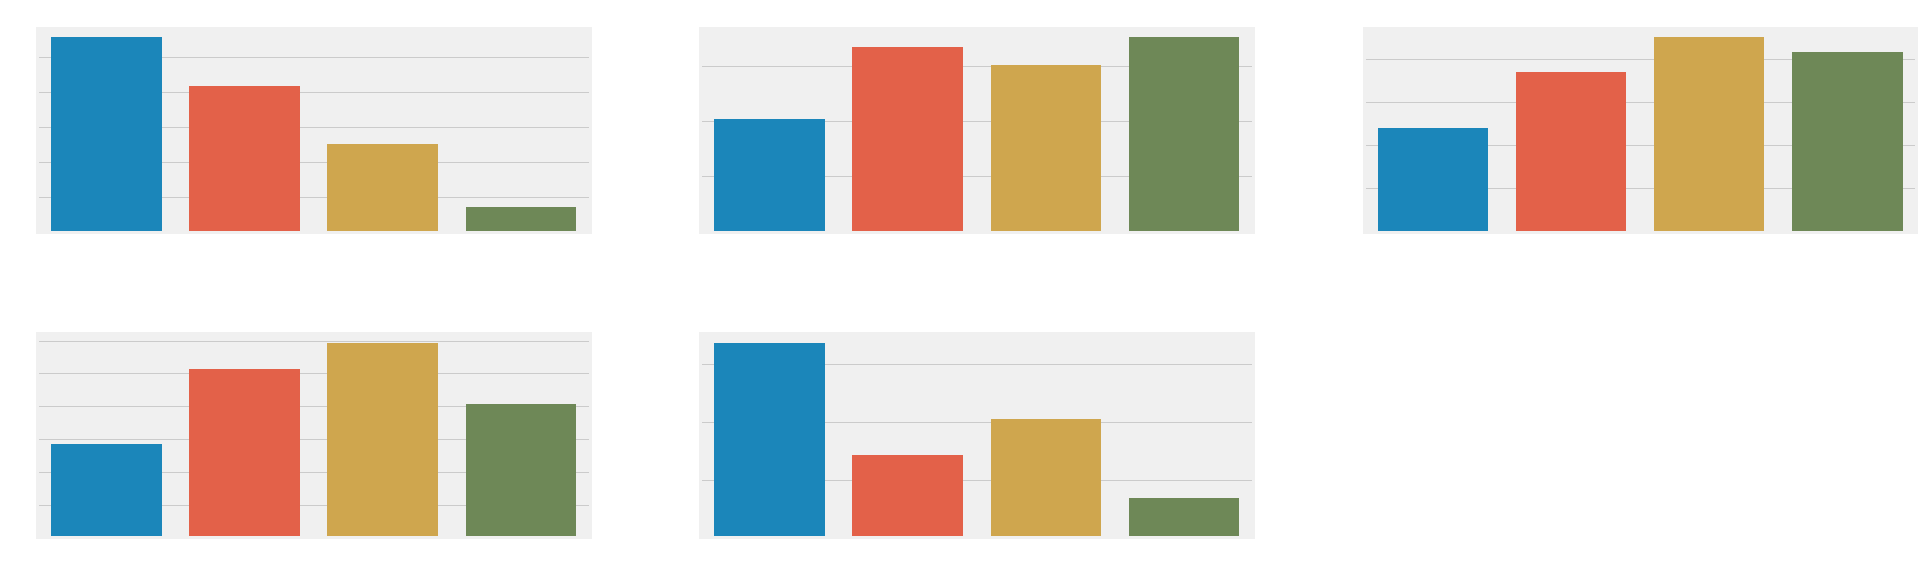

In [36]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,15))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

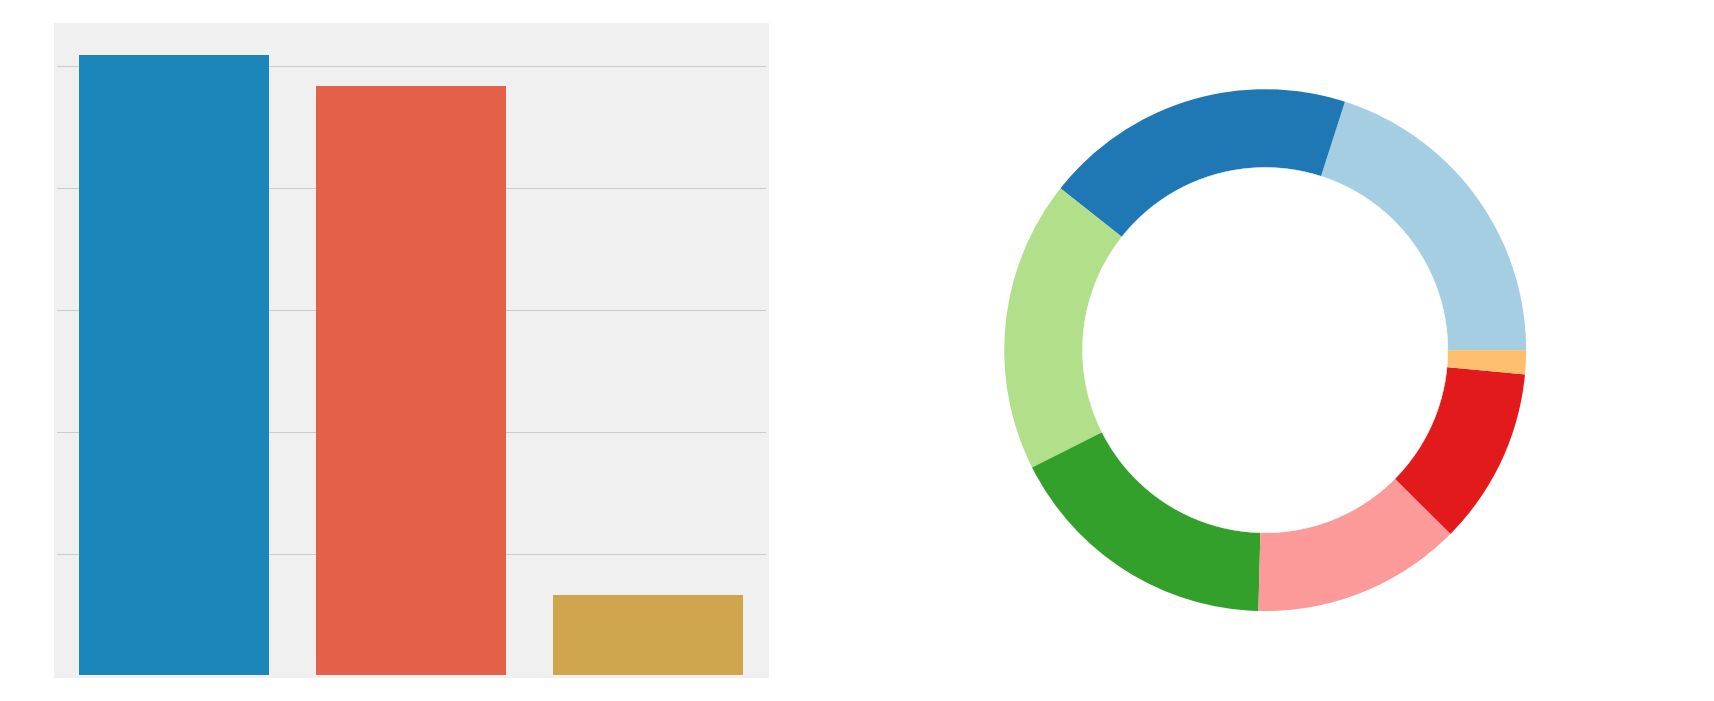

In [37]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')

scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

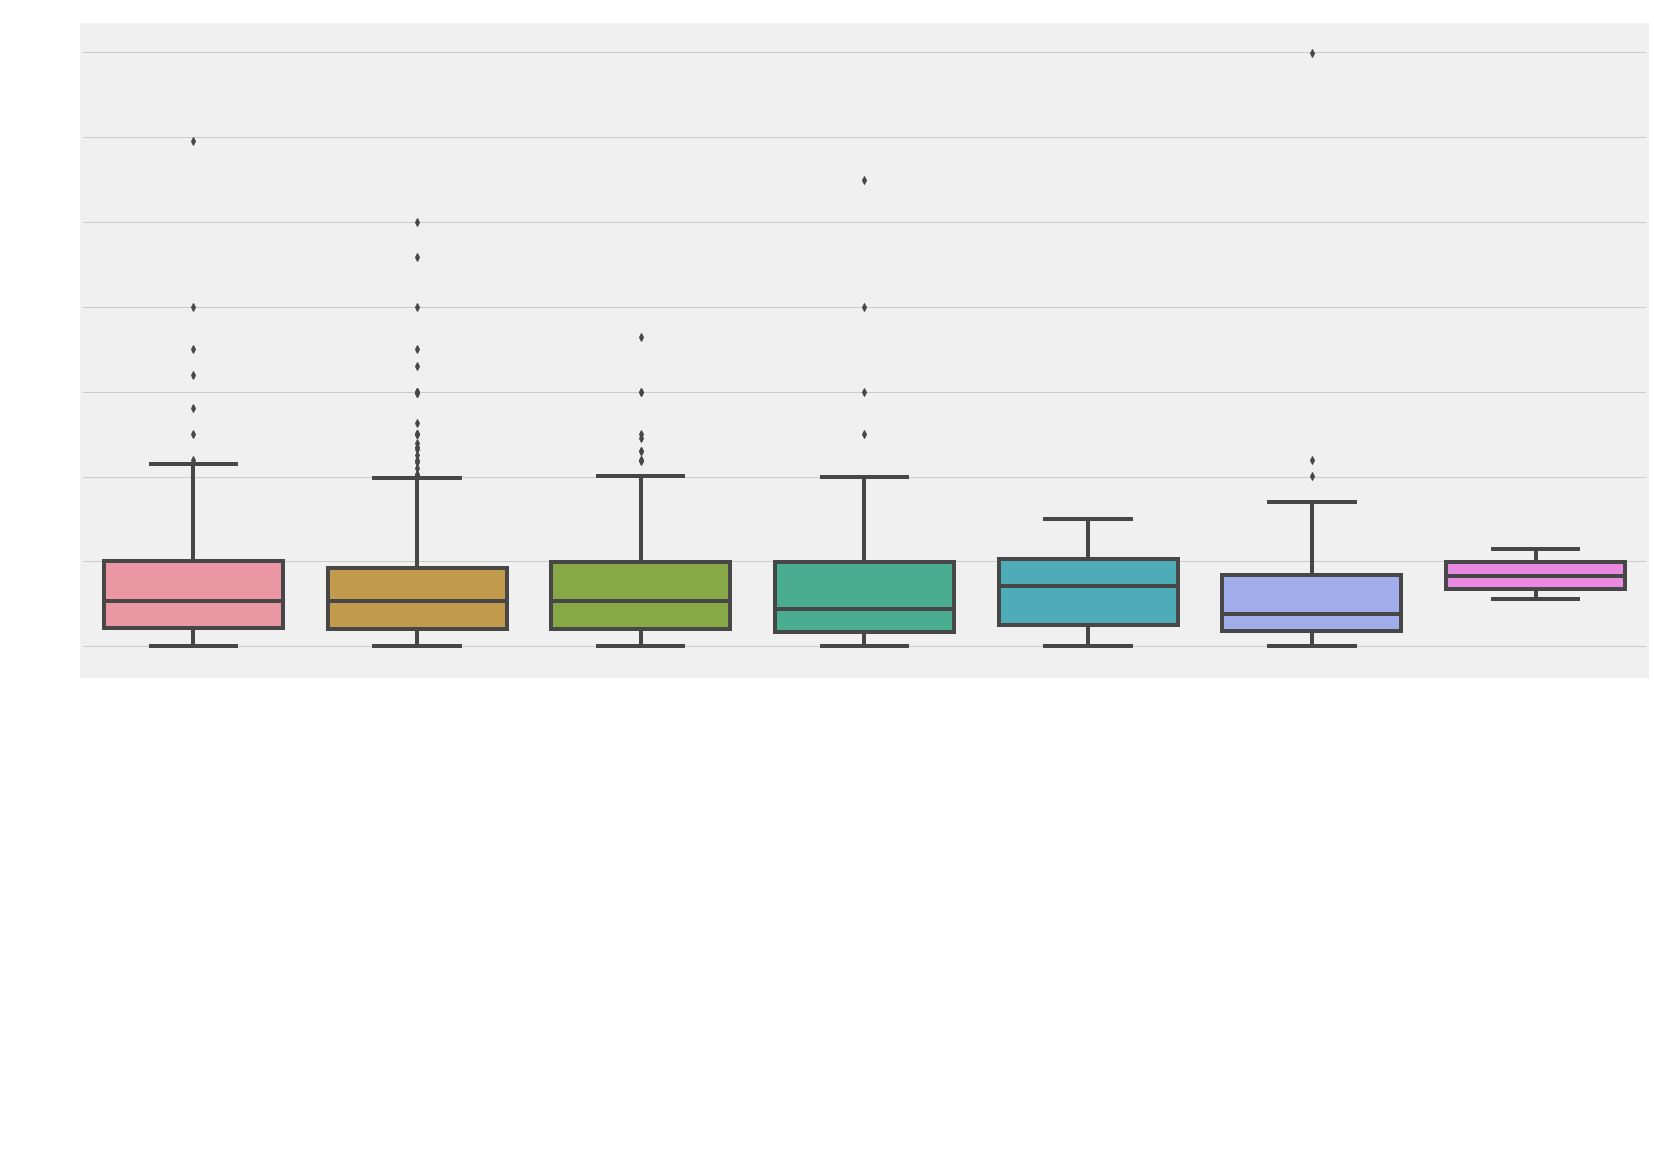

In [38]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

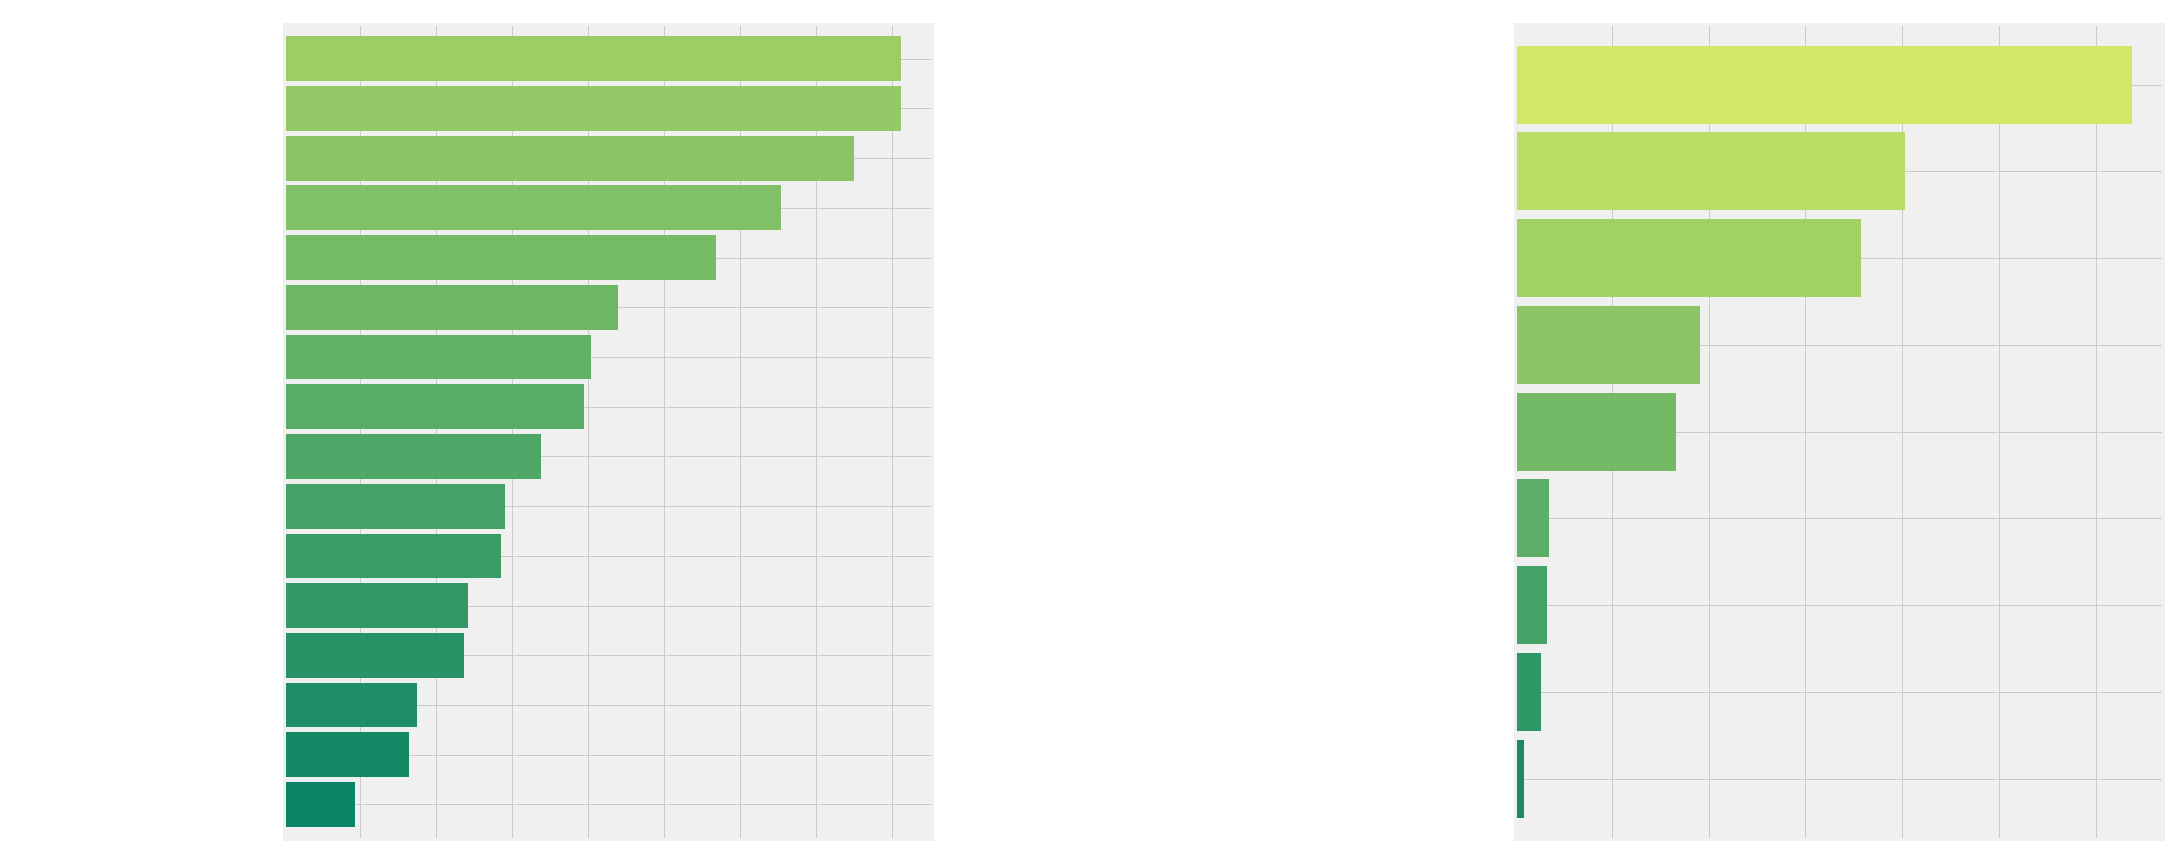

In [39]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

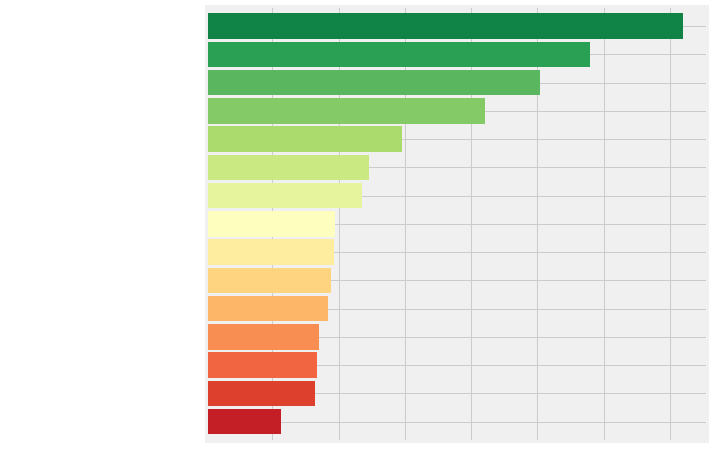

In [40]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()